In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [86]:
#pip install pandas openpyxl

# import and prep accountability indicators data

## accountability indicators  Scores

In [89]:
#import accountability_indicators_data
accountability_indicator_2022 = pd.read_excel('../data/Education 2021_24/Accountability Indicator Scores and Data for Schools/school_indicator_scores_suppressed_2022.xlsx')
accountability_indicator_2023 = pd.read_excel('../data/Education 2021_24/Accountability Indicator Scores and Data for Schools/school_indicator_scores_suppressed_2023.xlsx')
accountability_indicator_2024 = pd.read_excel('../data/Education 2021_24/Accountability Indicator Scores and Data for Schools/school_indicator_scores_suppressed_2024.xlsx')
# add year column to accountability_indicator files
accountability_indicator_2022['year']  = 2022
accountability_indicator_2023['year']  = 2023
accountability_indicator_2024['year']  = 2024

print(accountability_indicator_2022.shape)
print(accountability_indicator_2023.shape)
print(accountability_indicator_2024.shape)


(20642, 14)
(21427, 14)
(21158, 14)


In [90]:
# concatenate accountability indicator files 
accountability_indicators = pd.concat([accountability_indicator_2022, accountability_indicator_2023,accountability_indicator_2024], 
                                      ignore_index=True)
accountability_indicators.head()


,system,system_name,school,school_name,pool,designation_ineligible,student_group,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa,year
0,10,Anderson County,2,Anderson County High School,HS,0.0,All Students,2.0,3.0,2.0,4.0,4.0,NaN,2022
1,10,Anderson County,2,Anderson County High School,HS,0.0,American Indian or Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,2022
2,10,Anderson County,2,Anderson County High School,HS,0.0,Asian,NaN,NaN,NaN,NaN,NaN,NaN,2022
3,10,Anderson County,2,Anderson County High School,HS,0.0,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,2022
4,10,Anderson County,2,Anderson County High School,HS,0.0,Black/Hispanic/Native American,NaN,2.0,4.0,NaN,NaN,NaN,2022


In [91]:
accountability_indicators.shape

(63227, 14)

In [92]:
len(accountability_indicators['school_name'].unique())

1825

In [93]:
len(accountability_indicators[['system_name'].unique())

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3883217333.py, line 1)

In [ ]:
accountability_indicators[['system_name','school_name']].value_counts()


In [ ]:
accountability_indicators[['system','school']].value_counts()

In [ ]:
#create id column for accountability_indicators df
accountability_indicators['id'] = accountability_indicators['system'].astype(str)+'_'+accountability_indicators['school'].astype(str)

## accountablity metrics

In [98]:
# import school accountablity data
accountablity_2021 = pd.read_excel('../data/Education 2021_24/Accountablity/school_level/school_release_file_suppressed_2021.xlsx')
accountablity_2022 = pd.read_excel('../data/Education 2021_24/Accountablity/school_level/school_release_file_suppressed_2022.xlsx')
accountablity_2023= pd.read_excel('../data/Education 2021_24/Accountablity/school_level/school_release_file_suppressed_2023.xlsx')
accountablity_2024 = pd.read_excel('../data/Education 2021_24/Accountablity/school_level/school_release_file_suppressed_2024.xlsx')
print(accountablity_2021.shape)
print(accountablity_2022.shape)
print(accountablity_2023.shape)
print(accountablity_2024.shape)

(43482, 18)
(45359, 18)
(45006, 18)
(45022, 18)


In [104]:
#Union all/ concatenate the data sets
accountablity_subject = pd.concat([accountablity_2021,accountablity_2022,accountablity_2023,accountablity_2024], ignore_index = True)

accountablity_subject.shape

(178869, 18)

In [106]:
accountablity_subject = accountablity_subject.dropna()
accountablity_subject.shape

(178869, 18)

In [108]:
#check datatypes
accountablity_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178869 entries, 0 to 178868
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   year                       178869 non-null  int64 
 1   system                     178869 non-null  int64 
 2   system_name                178869 non-null  object
 3   school                     178869 non-null  int64 
 4   school_name                178869 non-null  object
 5   subject                    178869 non-null  object
 6   grade                      178869 non-null  object
 7   student_group              178869 non-null  object
 8   valid_tests                178869 non-null  int64 
 9   n_below                    178869 non-null  object
 10  n_approaching              178869 non-null  object
 11  n_met_expectations         178869 non-null  object
 12  n_exceeded_expectations    178869 non-null  object
 13  pct_below                  178869 non-null  

In [228]:
#convert expectation columns to numeric replace supression symbols with nan
accountablity_subject['valid_tests'] = pd.to_numeric(accountablity_subject['valid_tests'], errors='coerce')
accountablity_subject['n_below'] = pd.to_numeric(accountablity_subject['n_below'], errors='coerce')
accountablity_subject['n_approaching'] = pd.to_numeric(accountablity_subject['n_approaching'], errors='coerce')
accountablity_subject['n_met_expectations'] = pd.to_numeric(accountablity_subject['n_met_expectations'], errors='coerce')
accountablity_subject['n_exceeded_expectations'] = pd.to_numeric(accountablity_subject['n_exceeded_expectations'], errors='coerce')

In [230]:
accountablity_subject.shape

(178869, 18)

In [232]:
#subset the data for n_met_expectation & n_exceeded_expectation non _ nan
accountablity_all_achievement = accountablity_subject[(accountablity_subject['n_met_expectations'].notna()) & (accountablity_subject['n_exceeded_expectations'].notna())]
accountablity_all_achievement.shape

(38636, 18)

In [200]:
#aggregate for all subjects -- i am hoping sum function to igrone nan 
accountablity_all = (accountablity_all_achievement.groupby(['year', 'system', 'system_name', 'school', 'school_name','student_group',
       'grade']).agg(valid_tests = ('valid_tests','sum'),
                                n_below = ('n_below','sum'),
                                n_approaching = ('n_approaching', 'sum'),                                
                                 n_met_expectations = ('n_met_expectations','sum'),
                                 n_exceeded_expectations = ('n_exceeded_expectations','sum'))).reset_index()

In [202]:
accountablity_all.shape

(19966, 12)

In [204]:
accountablity_all.head(2)

,year,system,system_name,school,school_name,student_group,grade,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations
0,2021,10,Anderson County,2,Anderson County High School,All Students,9th through 12th,240,56.0,101.0,66.0,17.0
1,2021,10,Anderson County,2,Anderson County High School,Black/Hispanic/Native American,9th through 12th,13,1.0,6.0,5.0,1.0


In [206]:
#create id column for accountability df
accountablity_all['id'] = accountablity_all['system'].astype(str) + '_' +  accountablity_all['school'].astype(str)

## schools info

In [209]:
#import school info data

school_info = pd.read_csv("../data/Education 2021_24/TN-School-Directory.csv")

school_info.head(1)

,Unnamed: 0,Unnamed: 1,Region Name,School Name,Type,District,Principal,District No.,School Name.1,School No.,...,Status,Address 1,Address 1 City,Address 1 State,Address 1 Zipcode,Address 2,Phone 1,Phone 2,Fax,Email Address
0,4ac4b72d-73b9-ef11-b8e8-000d3a10f6ae,75b2d0d8-6fb9-ef11-b8e8-7c1e5281f2f9,Accredited Online Schools,Abeka Academy,Private,Middle States Association-Commissions on Eleme...,Faith Anderson,99601,Abeka Academy,9600,...,Active,"PO Box 17600\n Pensacola, FL 32522",Pensacola,FL,32522,NaN,800-874-3592,NaN,NaN,customerservice@abeka.com


In [211]:
#create id column for school directory
school_info['id'] = school_info['District No.'].astype(str) + '_' + school_info['School No.'].astype(str)
#subset school info
school_info_zip = school_info[['id','Address 1 Zipcode']]
school_info_zip.head()

,id,Address 1 Zipcode
0,99601_9600,32522
1,99600_9661,85281
2,99600_9617,99201
3,99600_9621,63141
4,99601_9622,49103-1950


In [213]:
#merge district information zipcode
accountability_zip = accountablity_all.merge(school_info_zip, on = 'id',  how = 'left')

#check the join with known name
accountability_zip[accountability_zip['school_name'] == 'Stewarts Creek High School']['Address 1 Zipcode'].unique()

array(['37167'], dtype=object)

In [215]:
#check if all districts are matched
len(accountability_zip[accountability_zip['Address 1 Zipcode'].isna()])


264

In [217]:
#some schools are not matched zip codes
#find another school directory to match all schools


## calculate state achievement Rate
percentage of students  whose score met expectations or exceeded expectations across all tested subjects

In [220]:
accountability_zip['achievement_rate'] = round((accountability_zip['n_met_expectations']+ 
                                         accountability_zip['n_exceeded_expectations'])*100 /  accountability_zip['valid_tests'],2)

In [222]:
accountability_zip.head(1)

,year,system,system_name,school,school_name,student_group,grade,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,id,Address 1 Zipcode,achievement_rate
0,2021,10,Anderson County,2,Anderson County High School,All Students,9th through 12th,240,56.0,101.0,66.0,17.0,10_2,37716,34.58


In [224]:
#average achievement rate for disctricts for grade bands
avg_achievement_rate = accountability_zip.groupby(['year', 'system', 'system_name','Address 1 Zipcode', 'student_group', 'grade']).agg(
                        valid_tests = ('valid_tests', 'sum'),
                        n_below = ('n_below', 'sum'),
                        n_approaching = ('n_approaching','sum'),                        
                        n_met_expectations = ('n_met_expectations','sum'),
                        n_exceeded_expectations = ('n_exceeded_expectations','sum'),
                     achievement_rate = ('achievement_rate','mean')).reset_index()
avg_achievement_rate.head()
   

,year,system,system_name,Address 1 Zipcode,student_group,grade,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,achievement_rate
0,2021,10,Anderson County,37705,All Students,3rd through 5th,410,59.0,150.0,147.0,54.0,49.02
1,2021,10,Anderson County,37705,Economically Disadvantaged,3rd through 5th,44,18.0,10.0,8.0,8.0,36.36
2,2021,10,Anderson County,37705,Super Subgroup,3rd through 5th,104,35.0,37.0,19.0,13.0,30.77
3,2021,10,Anderson County,37710,All Students,3rd through 5th,52,17.0,21.0,11.0,3.0,26.92
4,2021,10,Anderson County,37716,All Students,3rd through 5th,132,34.0,43.0,44.0,11.0,41.67


In [234]:
avg_achievement_rate_year = avg_achievement_rate.groupby('year')['achievement_rate'].mean().reset_index()
avg_achievement_rate_year


,year,achievement_rate
0,2021,36.605810
1,2022,36.411645
2,2023,36.761462
3,2024,37.069132


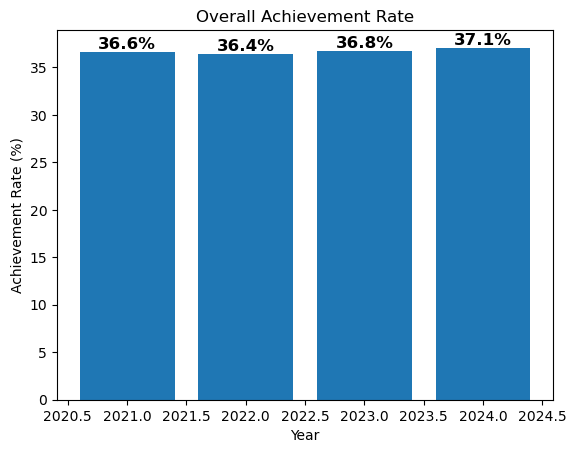

In [240]:
# Create figure and axis
fig, ax = plt.subplots()

# Plot bars
bars = ax.bar(avg_achievement_rate_year['year'], avg_achievement_rate_year['achievement_rate'])

# Annotate each bar with achievement rate
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-position (center of bar)
        bar.get_height(),  # Y-position (height of the bar)
        f"{bar.get_height():.1f}%",  # Label text with one decimal place
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Achievement Rate (%)")
ax.set_title("Overall Achievement Rate")

plt.show()

In [334]:
#achievement rate by districts for 2024
avg_achievement_rate_24 = avg_achievement_rate[avg_achievement_rate['year'] == 2024]

avg_achievement_rate_district = (
    avg_achievement_rate_24.groupby('system_name')['achievement_rate']
    .mean()
    .reset_index()
    .sort_values(by = 'achievement_rate', ascending = False)
)

avg_achievement_rate_district.head()

,system_name,achievement_rate
4,Arlington,51.465882
140,Williamson County,50.529382
26,Collierville,50.422870
23,Clinton,48.893750
43,Germantown,48.260000


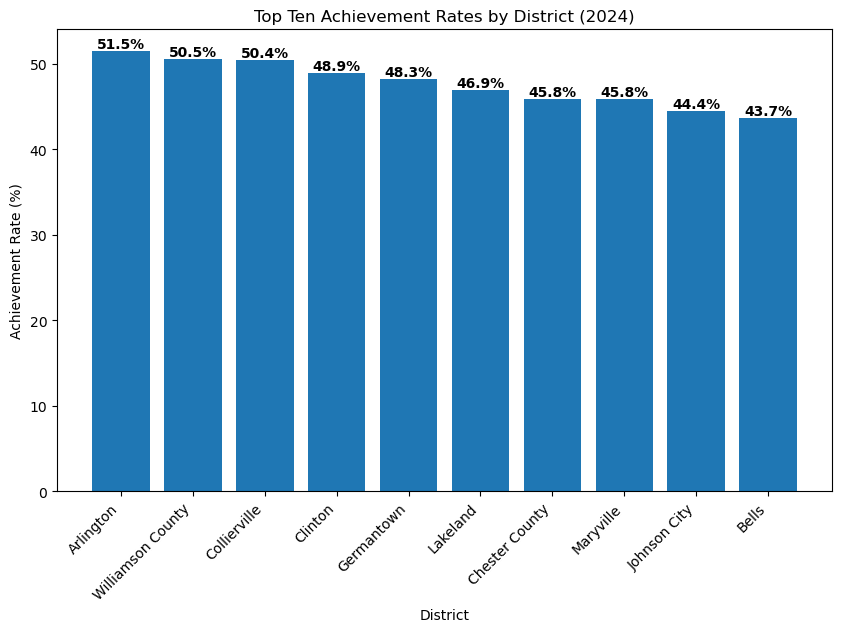

In [348]:
data_largest = avg_achievement_rate_district.head(10)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars = ax.bar(data_largest['system_name'], data_largest['achievement_rate'])

# Annotate each bar with achievement rate
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-position (center of bar)
        bar.get_height(),  # Y-position (height of the bar)
        f"{bar.get_height():.1f}%",  # Label text with one decimal place
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

# Labels and title
ax.set_xlabel("District")
ax.set_ylabel("Achievement Rate (%)")
ax.set_title("Top Ten Achievement Rates by District (2024)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

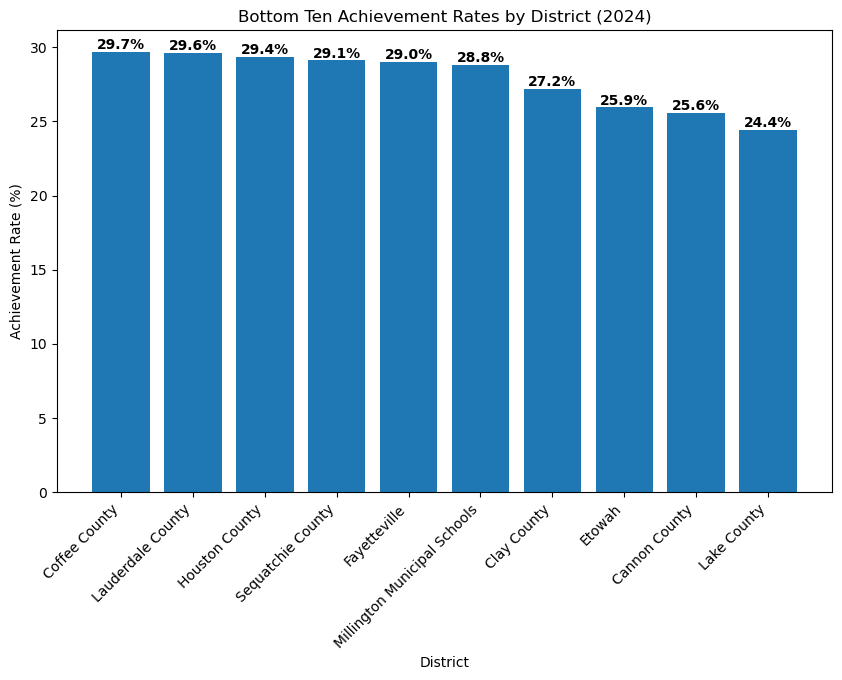

In [350]:
data_smallest = avg_achievement_rate_district.tail(10)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars = ax.bar(data_smallest['system_name'], data_smallest['achievement_rate'])

# Annotate each bar with achievement rate
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-position (center of bar)
        bar.get_height(),  # Y-position (height of the bar)
        f"{bar.get_height():.1f}%",  # Label text with one decimal place
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

# Labels and title
ax.set_xlabel("District")
ax.set_ylabel("Achievement Rate (%)")
ax.set_title("Bottom Ten Achievement Rates by District (2024)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
#add shade map

In [399]:
#average achievement rate for districts for student groups
student_groups = avg_achievement_rate[avg_achievement_rate['student_group']!='All Students']
avg_achievement_rate_groups = (
    student_groups.groupby(['year', 'student_group'])['achievement_rate']
    .mean()
    .sort_values(ascending=False)  # Remove `by='achievement_rate'`
    .reset_index()
)


<BarContainer object of 20 artists>

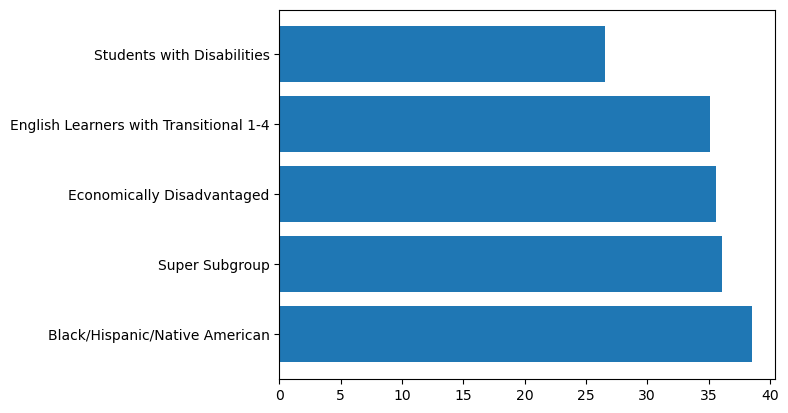

In [401]:
plt.barh(avg_achievement_rate_groups['student_group'], avg_achievement_rate_groups['achievement_rate'])

In [ ]:
# Does the performance show similarity across all grade bands?

# student issues
### discipline VS achievement
### attendance VS achievement

# school issues
### staff metrics

# district
### crime
### population density